In [1]:
#import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Customer-Churn-Prediction.csv') #import data set 

In [3]:
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

C:\Users\study mart\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

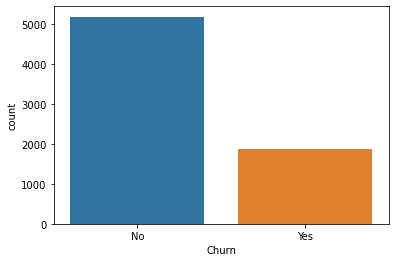

In [7]:
sns.countplot(df['Churn'])

# Basic Visualization using Seaborn Library

<AxesSubplot:xlabel='gender', ylabel='count'>

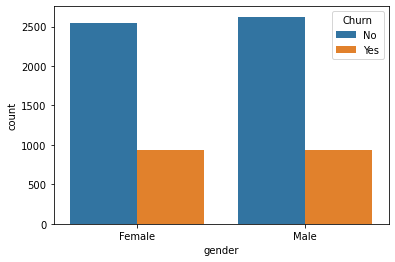

In [8]:
sns.countplot(x = 'gender', hue='Churn', data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

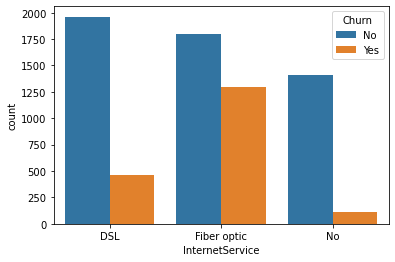

In [9]:
sns.countplot(x = 'InternetService',hue='Churn', data=df)

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

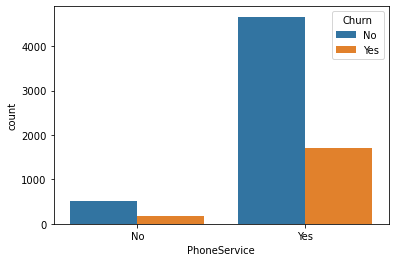

In [10]:
sns.countplot(x = 'PhoneService',hue='Churn', data=df)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

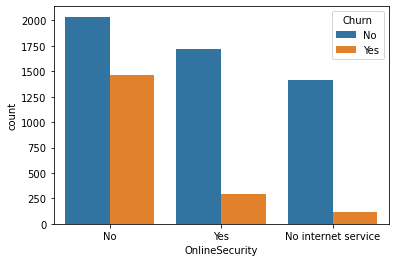

In [11]:
sns.countplot(x = 'OnlineSecurity',hue='Churn', data=df)

In [12]:
df['OnlineSecurity'].unique() 

array(['No', 'Yes', 'No internet service'], dtype=object)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

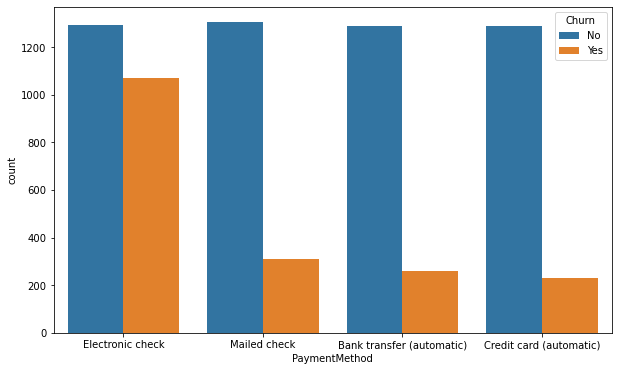

In [13]:
plt.subplots(figsize=(10,6)) 
sns.countplot(x = 'PaymentMethod',hue='Churn', data=df) 

# Preprocess the dataset

In [14]:
#Drop Customer id
df = df.drop('customerID', axis=1)

In [15]:
df.shape

(7043, 20)

# Encode the data set

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

<ipython-input-17-0134b5f5b5b2>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [ ]:
#seperate x, y

In [19]:
x = df.drop('Churn',axis=1) #separate dependent and independent variable
y = df['Churn']

In [20]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [21]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

# Hold Out Cross Validation

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain,xtest, ytrain,ytest = train_test_split(x, y, train_size=.75,random_state=42)

In [24]:
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6607,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,2,25.30,2153
2598,0,0,0,0,7,1,0,1,0,0,2,0,0,0,0,1,2,75.15,4396
2345,0,0,0,1,4,1,0,2,1,1,1,1,1,1,0,1,0,20.05,6211
4093,0,0,0,0,29,1,2,1,0,0,0,0,0,0,0,1,1,76.00,1850
693,0,0,0,0,3,1,2,1,0,0,0,0,0,0,0,1,1,75.10,2350


In [25]:
xtest.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,24.80,2044
2715,1,0,0,0,41,1,2,2,1,1,1,1,1,1,0,1,0,25.25,6522
3825,0,0,1,1,52,1,0,2,1,1,1,1,1,1,2,0,3,19.35,67
1807,0,0,0,0,1,1,0,1,0,0,2,0,0,0,0,0,2,76.35,5822
132,1,0,0,0,67,1,0,0,0,0,0,2,0,0,2,0,0,50.55,2837


In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
Clf = DecisionTreeClassifier()

In [28]:
Clf.fit(xtrain,ytrain) 

DecisionTreeClassifier()

In [29]:
Clf.score(xtest,ytest)

0.737649063032368

# Cross Validation

# K Fold CV

In [30]:
from sklearn.model_selection import KFold, cross_val_score

In [31]:
model = DecisionTreeClassifier()
kfold_validation=KFold(5) # k =5

In [32]:
results = cross_val_score(model,x,y,cv=kfold_validation)

In [33]:
results

array([0.73456352, 0.74520937, 0.72320795, 0.71875   , 0.74147727])

In [34]:
results.mean()

0.7326416220401315

In [35]:
results.min()

0.71875

In [36]:
results.max()

0.7452093683463449

# Stratified K-Fold

In [37]:
from sklearn.model_selection import StratifiedKFold

In [38]:
skfold = StratifiedKFold(n_splits=5)
model2 = DecisionTreeClassifier()

In [40]:
scores = cross_val_score(model2,x,y,cv=skfold)

In [41]:
scores

array([0.72675656, 0.7310149 , 0.72036906, 0.69886364, 0.74715909])

In [42]:
scores.mean()

0.7248326504935803

In [43]:
scores.max()

0.7471590909090909

In [45]:
scores.min()

0.6988636363636364

# Leave One Out (LOOCV)

In [46]:
from sklearn.model_selection import LeaveOneOut

In [47]:
model3=DecisionTreeClassifier()
leave_val = LeaveOneOut()

In [48]:
results = cross_val_score(model3, x, y, cv=leave_val)

In [49]:
results

array([0., 1., 1., ..., 1., 1., 1.])

In [50]:
results.shape

(7043,)

In [51]:
results.mean()

0.7351980690046855

# XGBOOST Classifier

In [52]:
import xgboost
from xgboost import XGBClassifier

In [53]:
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)

C:\Users\study mart\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
xgb.score(xtest,ytest)

0.7910278250993753

# AdaBoost Classifier

In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
ada = AdaBoostClassifier()
ada.fit(xtrain,ytrain) #train test split

AdaBoostClassifier()

In [57]:
ada.score(xtest,ytest)

0.797274275979557

# Differences

In [58]:
xgb_score = cross_val_score(xgb,x,y,cv=skfold) #cross validation

C:\Users\study mart\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:39:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\study mart\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:39:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\study mart\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:39:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\study mart\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:39:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\study mart\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:39:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [59]:
xgb_score

array([0.78069553, 0.79418027, 0.76792051, 0.77911932, 0.78835227])

In [60]:
ada_score = cross_val_score(ada,x,y,cv=skfold)

In [61]:
ada_score

array([0.8105039 , 0.80269695, 0.7920511 , 0.80610795, 0.80184659])

In [63]:
ada_score.mean()

0.8026412994386736